In [1]:
%pip install palmerpenguins



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import sys
sys.executable
from palmerpenguins import load_penguins
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Overall about Data and Analys The data

<p align="center">
  <img src="https://media.cheggcdn.com/media/607/607b71bb-2ade-43d0-90a6-3157768efdf2/phpCqGC3Z" alt="Penguin Feature">
</p>

* species: penguin species (Chinstrap, Adélie, or Gentoo)
* bill_length_mm: culmen length 
* bill_depth_mm: culmen depth 
* flipper_length_mm: flipper length 
* body_mass_g: body mass 
* island: island name (Dream, Torgersen, or Biscoe) 
* sex: penguin sex
* year: the year the born

In [3]:
penguins = load_penguins()
print(penguins.info()) # xem về info của data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB
None


In [4]:
penguins.head() # xem 5 dòng đầu

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [5]:
print(f"Data có {penguins.shape[0]} sample")
print("Các actribute của data:\n",list(penguins.keys()))

Data có 344 sample
Các actribute của data:
 ['species', 'island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex', 'year']


In [6]:
# thống kê các giá trị rời rạc
species_counts = penguins.groupby('species').size()
island_counts = penguins.groupby('island').size()
year_counts = penguins.groupby('year').size()
print("Species có các giá trị: ",species_counts.keys(), "\n")
print("Island có các giá trị: ",island_counts.keys(), "\n")
print("Year có các giá trị: ", year_counts.keys(), "\n")

Species có các giá trị:  Index(['Adelie', 'Chinstrap', 'Gentoo'], dtype='object', name='species') 

Island có các giá trị:  Index(['Biscoe', 'Dream', 'Torgersen'], dtype='object', name='island') 

Year có các giá trị:  Int64Index([2007, 2008, 2009], dtype='int64', name='year') 



In [7]:
# Kiểm tra các giá trị null
count = 0
for i in penguins.isnull().any():
    if i:
        count += 1
print(f"Có {count} cột có tồn tại giá trị Null\n")
print(penguins.isnull().sum())


Có 5 cột có tồn tại giá trị Null

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64


In [8]:
# Thay các giá trị null bằng Most_frequent: xuất hiện nhiều, median: trung vị, mean: trung bình hoặc là xóa bỏ nó
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent') # có thể set meadian hay mean cho các feature có giá trị liên tục
penguins.iloc[:,:] = imputer.fit_transform(penguins)


In [9]:
print(penguins.isnull().sum()) # xem  còn null không

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64


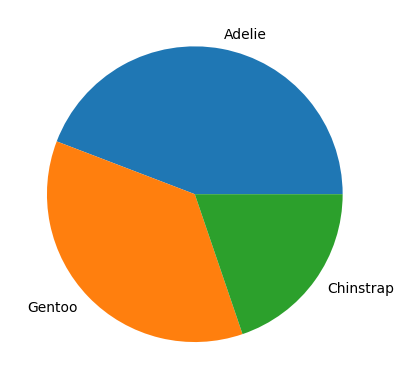

In [10]:
# thống kê về số lượng các field của species
plt.pie(penguins["species"].value_counts(),labels = penguins["species"].unique())
plt.show()

c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


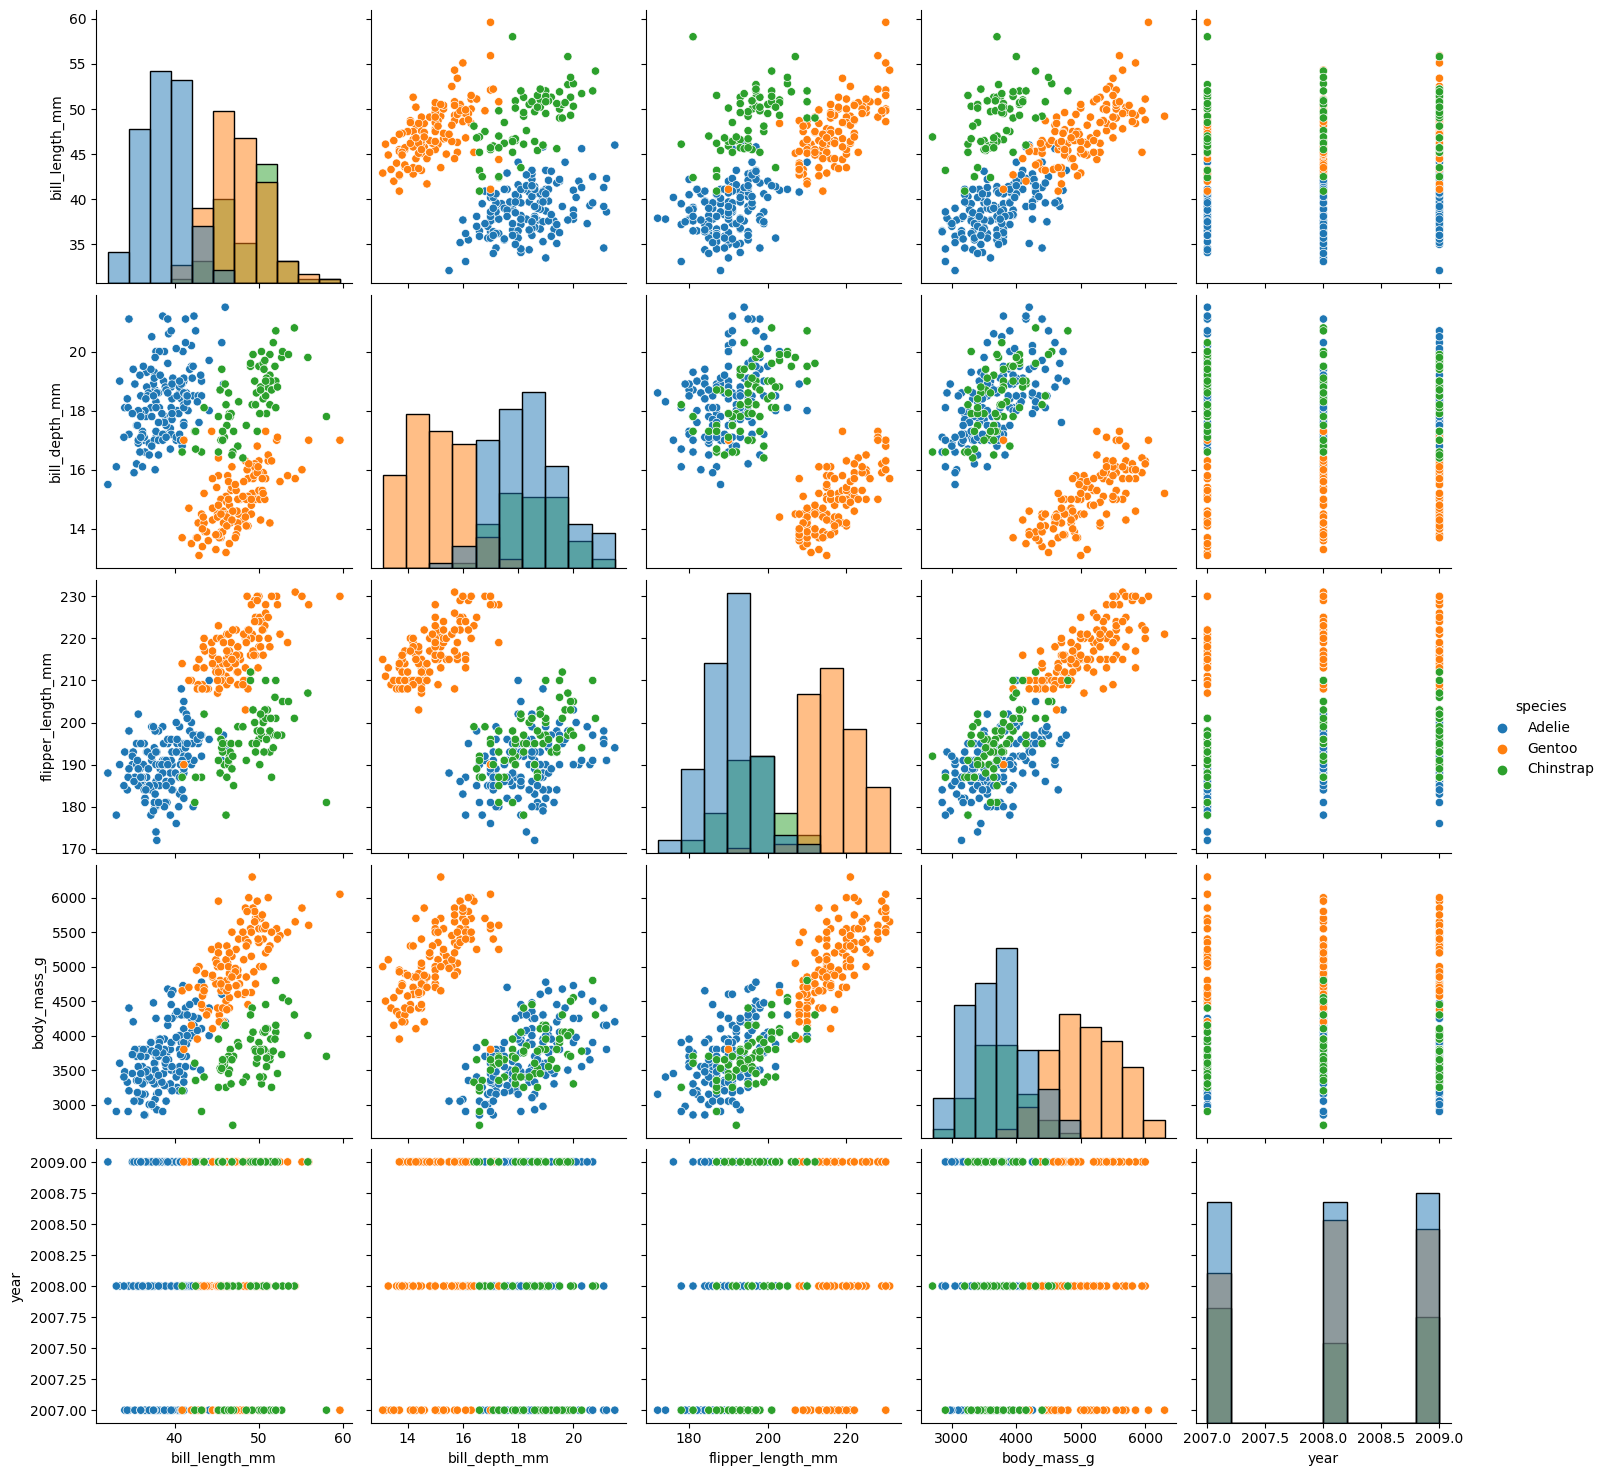

In [11]:
# Xem về các phân bố dữ liệu: histogram trên đường chéo
sns.pairplot(penguins, hue="species", size=3,diag_kind="hist")

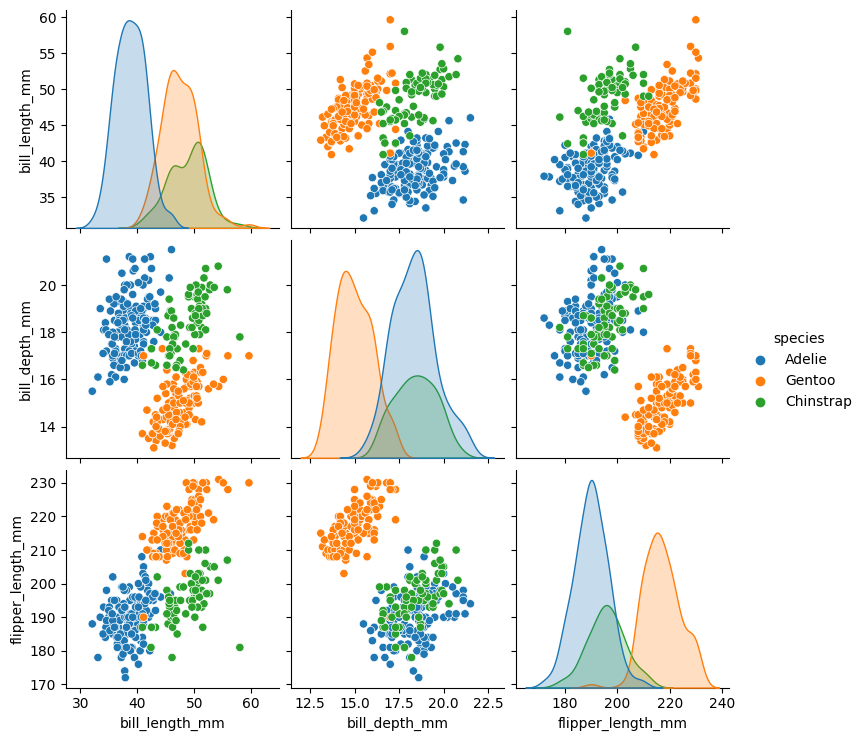

In [12]:
sns.pairplot(data=penguins, vars=penguins.columns[2:5], hue='species') # biểu đồ phân bố trên đường chéo


<AxesSubplot: xlabel='bill_length_mm', ylabel='Count'>

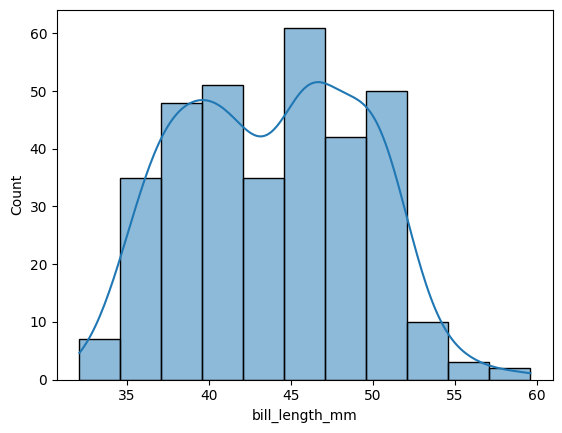

In [13]:
sns.histplot(data=penguins, x='bill_length_mm', kde=True)
# với độ bill_length thì chiếm nhiều nhất tầm ở bin từ 45mm-> 47mm

<AxesSubplot: xlabel='body_mass_g', ylabel='Count'>

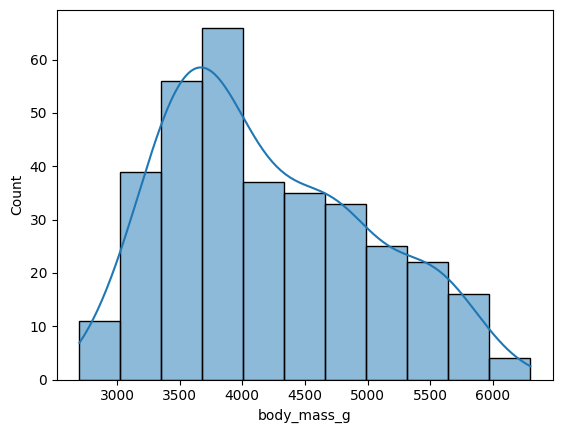

In [14]:
sns.histplot(data=penguins, x='body_mass_g', kde=True)
# với độ bill_length thì chiếm nhiều nhất tầm ở bin từ 3700 > 4000

## Tiền xử lý


In [15]:
# Số hóa các giá trị rời rạc
penguins=pd.get_dummies(penguins, columns = ["island"], prefix = ["island"]) # one hot encoding
species_mapping = {'Adelie': 0, 'Gentoo': 1, 'Chinstrap': 2} # mapping field
sex_mapping = {'male': 0, 'female': 1} # mapping field

# thay các giá trị trong bảng map
penguins["species"] = penguins["species"].replace(species_mapping) 
penguins["sex"] = penguins["sex"].replace(sex_mapping)

In [16]:
penguins.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,island_Biscoe,island_Dream,island_Torgersen
0,0,39.1,18.7,181.0,3750.0,0,2007,0,0,1
1,0,39.5,17.4,186.0,3800.0,1,2007,0,0,1
2,0,40.3,18.0,195.0,3250.0,1,2007,0,0,1
3,0,41.1,17.0,190.0,3800.0,0,2007,0,0,1
4,0,36.7,19.3,193.0,3450.0,1,2007,0,0,1


In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Có thể chỉ sử dụng một số atribute để tính toán, như chỉ lấy 4 loại kích thước kết hợp với 1 feature khác như là sex
X = penguins.iloc[:, 1:] # lấy hết các feature trừ cột 0 
Y = penguins["species"]

X_train, X_test, y_train, y_test = train_test_split(X,Y,
                                                    test_size=0.2,  # test size là 0.2 * total_sample
                                                    random_state=22520691) # mã số sinh viên

In [18]:
X.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,island_Biscoe,island_Dream,island_Torgersen
0,39.1,18.7,181.0,3750.0,0,2007,0,0,1
1,39.5,17.4,186.0,3800.0,1,2007,0,0,1
2,40.3,18.0,195.0,3250.0,1,2007,0,0,1
3,41.1,17.0,190.0,3800.0,0,2007,0,0,1
4,36.7,19.3,193.0,3450.0,1,2007,0,0,1


## Decision Tree

### Thử nghiệm các chuẩn: Gini, Entropy và Log_loss

In [19]:
feature_names = penguins.columns.tolist()[1:] # 
class_names = [str(cls) for cls in penguins['species'].unique()]

max_dept: 2, accuracy: 0.9420289855072463

max_dept: 3, accuracy: 0.9420289855072463

max_dept: 4, accuracy: 0.9420289855072463

max_dept: 5, accuracy: 0.9420289855072463

max_dept: 6, accuracy: 0.9420289855072463

max_dept: 7, accuracy: 0.9420289855072463

max_dept: 8, accuracy: 0.9420289855072463

max_dept: 9, accuracy: 0.9420289855072463

max_dept: 10, accuracy: 0.9420289855072463

Accuracy cao nhất là trường hợp có độ sâu tối đa là 2: 0.9420289855072463


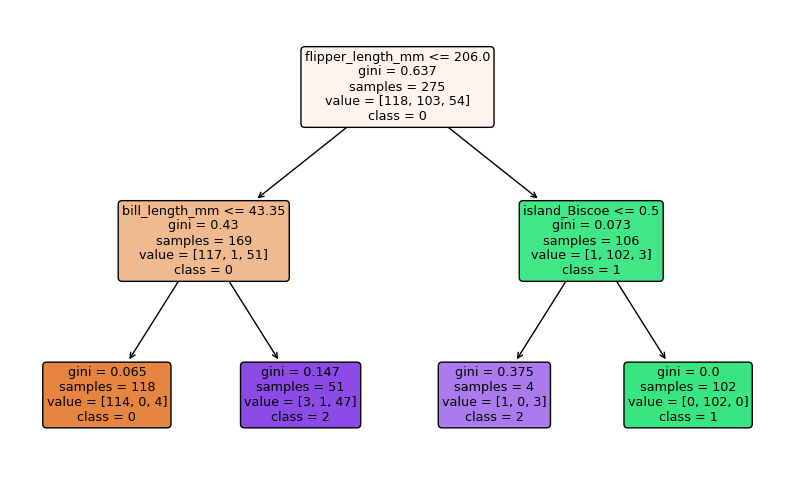

In [20]:
# Chuẩn default là Gini
accuracy_max = None
dept_max = None
model_best = None
for i in range(2,11):
    model = DecisionTreeClassifier(max_depth=i, random_state=42) 
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    line = f"max_dept: {i}, accuracy: {accuracy}\n"
    print(line)        
    if accuracy_max == None and dept_max == None:
            accuracy_max = accuracy
            dept_max = i
            model_best = model
    if accuracy > accuracy_max:
        accuracy_max = accuracy
        dept_max = i
        model_best = model

        
print(f"Accuracy cao nhất là trường hợp có độ sâu tối đa là {dept_max}: {accuracy_max}")
plt.figure(figsize=(10, 6))
plot_tree(model_best, feature_names=feature_names, class_names=class_names, filled=True, rounded=True)
plt.show()


max_dept: 2, accuracy: 0.9130434782608695

max_dept: 3, accuracy: 0.9420289855072463

max_dept: 4, accuracy: 0.9420289855072463

max_dept: 5, accuracy: 0.9420289855072463

max_dept: 6, accuracy: 0.9420289855072463

max_dept: 7, accuracy: 0.9420289855072463

max_dept: 8, accuracy: 0.9420289855072463

max_dept: 9, accuracy: 0.9420289855072463

max_dept: 10, accuracy: 0.9420289855072463

Accuracy cao nhất là trường hợp có độ sâu tối đa là 3: 0.9420289855072463


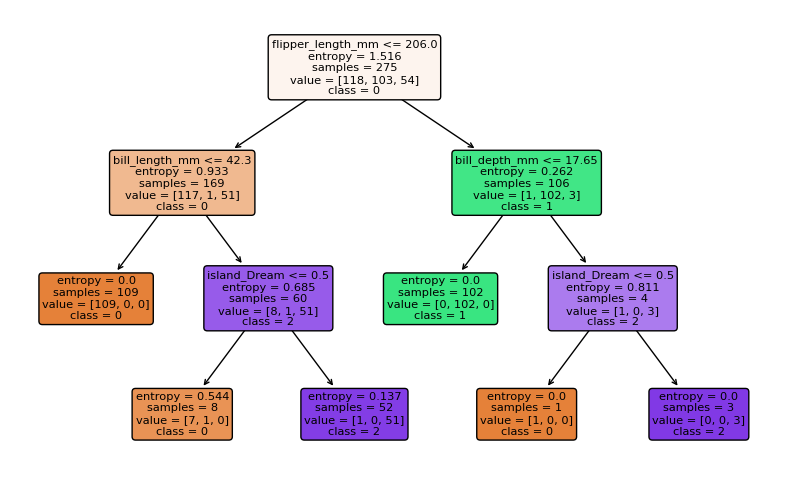

In [21]:
# Thay chuẩn gini thành entropy
accuracy_max = None
dept_max = None
model_best = None
for i in range(2,11):
    model = DecisionTreeClassifier(max_depth=i, random_state=42, criterion="entropy") 
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    line = f"max_dept: {i}, accuracy: {accuracy}\n"
    print(line)        
    if accuracy_max == None and dept_max == None:
            accuracy_max = accuracy
            dept_max = i
            model_best = model
    if accuracy > accuracy_max:
        accuracy_max = accuracy
        dept_max = i
        model_best = model
        
print(f"Accuracy cao nhất là trường hợp có độ sâu tối đa là {dept_max}: {accuracy_max}")
feature_names = penguins.columns.tolist()[1:]
class_names = [str(cls) for cls in penguins['species'].unique()]
plt.figure(figsize=(10, 6))
plot_tree(model_best, feature_names=feature_names, class_names=class_names, filled=True, rounded=True)
plt.show()

# Kết quả không tăng ở các max_dept > 2, khi đó các cây hầu như có biểu hiện giống nhau

max_dept: 2, accuracy: 0.9130434782608695

max_dept: 3, accuracy: 0.9420289855072463

max_dept: 4, accuracy: 0.9420289855072463

max_dept: 5, accuracy: 0.9420289855072463

max_dept: 6, accuracy: 0.9420289855072463

max_dept: 7, accuracy: 0.9420289855072463

max_dept: 8, accuracy: 0.9420289855072463

max_dept: 9, accuracy: 0.9420289855072463

max_dept: 10, accuracy: 0.9420289855072463

Accuracy cao nhất là trường hợp có độ sâu tối đa là 3: 0.9420289855072463


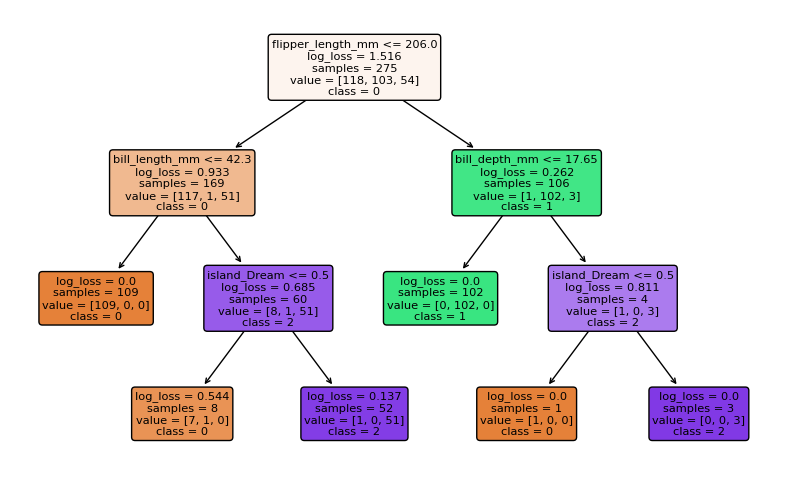

In [22]:
# Thay chuẩn gini thành log_loss
accuracy_max = None
dept_max = None
for i in range(2,11):
    model = DecisionTreeClassifier(max_depth=i, random_state=42, criterion="log_loss") 
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    line = f"max_dept: {i}, accuracy: {accuracy}\n"
    print(line)        
    if accuracy_max == None and dept_max == None:
            accuracy_max = accuracy
            dept_max = i
    if accuracy > accuracy_max:
        accuracy_max = accuracy
        dept_max = i
        
print(f"Accuracy cao nhất là trường hợp có độ sâu tối đa là {dept_max}: {accuracy_max}")
model = DecisionTreeClassifier(max_depth=dept_max, random_state=42, criterion="log_loss")
model.fit(X_train, y_train)
feature_names = penguins.columns.tolist()[1:]
class_names = [str(cls) for cls in penguins['species'].unique()]
plt.figure(figsize=(10, 6))
plot_tree(model, feature_names=feature_names, class_names=class_names, filled=True, rounded=True)
plt.show()
# Kết quả không tăng ở các max_dept > 2, khi đó các cây hầu như có biểu hiện giống nhau

#### Kết luận:
Qua thực nghiệm nhận thấy chuẩn ở độ sâu tối đa là 2 -> 5 với **best accuracy = 0.9420289855072463** thì mô hình đạt trạng thái tốt và chuẩn Gini có vẻ tốt hơn so với Entropy và Logloss ở bộ dữ liệu này, ta sẽ thử thêm một vài param để xem kết quả có cải thiện không

max_dept: 2, accuracy: 0.927536231884058

max_dept: 3, accuracy: 0.9420289855072463

max_dept: 4, accuracy: 0.9420289855072463

max_dept: 5, accuracy: 0.9565217391304348

max_dept: 6, accuracy: 0.9420289855072463

max_dept: 7, accuracy: 0.9130434782608695

max_dept: 8, accuracy: 0.9130434782608695

max_dept: 9, accuracy: 0.9130434782608695

max_dept: 10, accuracy: 0.9130434782608695

Accuracy cao nhất là trường hợp có độ sâu tối đa là 4 và số sample tối thiểu của một lá 5: 0.9565217391304348


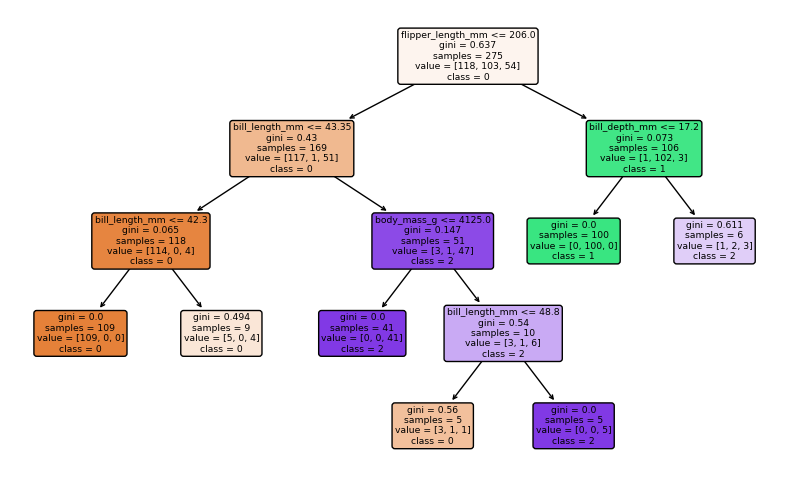

In [23]:
# Set cố định deep max là 4
# param: min_samples_leaf: số sample tối thiểu của một node lá
accuracy_max = None
msl_best = None
model_best = None
for i in range(2,11):
    model = DecisionTreeClassifier(max_depth=4, random_state=42, min_samples_leaf=i, ) # set sample ít nhất của một leaf là 5
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    line = f"max_dept: {i}, accuracy: {accuracy}\n"
    print(line)        
    if accuracy_max == None and msl_best == None:
            accuracy_max = accuracy
            msl_best = i
            model_best = model
    if accuracy > accuracy_max:
        accuracy_max = accuracy
        msl_best = i
        model_best = model

        
print(f"Accuracy cao nhất là trường hợp có độ sâu tối đa là 4 và số sample tối thiểu của một lá {msl_best}: {accuracy_max}")
plt.figure(figsize=(10, 6))
plot_tree(model_best, feature_names=feature_names, class_names=class_names, filled=True, rounded=True)
plt.show()

# Với min_samples_leaf từ 2 -> 5 thì kết quả khá tốt, nhưng sau đó giảm hiệu quả nếu số samples ở các leaf cuối quá cao

max_dept: 2, accuracy: 0.927536231884058

max_dept: 3, accuracy: 0.9420289855072463

max_dept: 4, accuracy: 0.9420289855072463

max_dept: 5, accuracy: 0.9565217391304348

max_dept: 6, accuracy: 0.9420289855072463

max_dept: 7, accuracy: 0.9130434782608695

max_dept: 8, accuracy: 0.9130434782608695

max_dept: 9, accuracy: 0.9130434782608695

max_dept: 10, accuracy: 0.9130434782608695

Accuracy cao nhất là trường hợp có độ sâu tối đa là 4 và số sample tối thiểu của một node 5: 0.9565217391304348


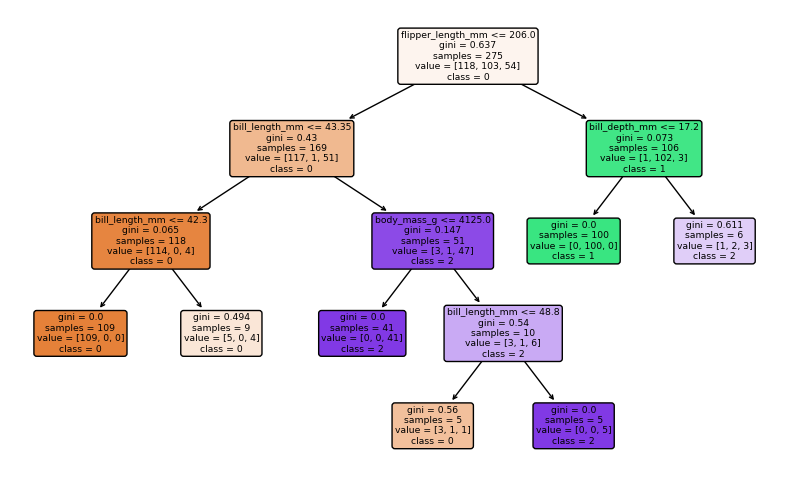

In [24]:
# Set cố định deep max là 4
# param: min_samples_leaf: số sample tối thiểu của một node 
accuracy_max = None
msl_best = None
model_best = None
for i in range(2,11):
    model = DecisionTreeClassifier(max_depth=4, random_state=42, min_samples_leaf=i, ) # set sample ít nhất của một node là 5
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    line = f"max_dept: {i}, accuracy: {accuracy}\n"
    print(line)        
    if accuracy_max == None and msl_best == None:
            accuracy_max = accuracy
            msl_best = i
            model_best = model
    if accuracy > accuracy_max:
        accuracy_max = accuracy
        msl_best = i
        model_best = model

        
print(f"Accuracy cao nhất là trường hợp có độ sâu tối đa là 4 và số sample tối thiểu của một node {msl_best}: {accuracy_max}")
plt.figure(figsize=(10, 6))
plot_tree(model_best, feature_names=feature_names, class_names=class_names, filled=True, rounded=True)
plt.show()

# Với min_samples_split từ 2 -> 5 thì kết quả khá tốt, nhưng sau đó giảm hiệu quả nếu số samples ở các node quá cao

#### Kết luận:
Với max_dept cố định là 4, ta thay đổi số samples tối thiểu ở từng nút lá và số samples của các node, khi đó mô hình học thêm được những quan hệ mới và có phần tố hơn mô hình ban đầu (nhiều sample split dưới 3), và đạt kết quả tốt với min_sample_leaf = 5 với **accuracy = 0.9565217391304348**

Ngoài ra còn khá nhiều params để ta có thể thử:

    - min_feature_split
    - max_feaute
    - ccp_alpha
    ...



Ngoài ra ta còn có thể thay đổi các feature dùng để train để xem kết quả như thế nào.
Như đã nhìn thấy ở biểu đồ thì với các feature về độ dài và độ sâu các bộ phận chim cách cụt thì có sự phân bố khá rõ ràng, nên ta có thể sẽ chỉ lấy những feature này

In [25]:
X = penguins.iloc[:, 1:5] # lấy atribute trừ cột 1 -> 4
Y = penguins["species"]

X_train, X_test, y_train, y_test = train_test_split(X,Y,
                                                    test_size=0.2, 
                                                    random_state=22520691) # mã số sinh viên
X.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,41.1,17.0,190.0,3800.0
4,36.7,19.3,193.0,3450.0


In [26]:
feature_names = penguins.columns.tolist()[1:5] # 
class_names = [str(cls) for cls in penguins['species'].unique()]

max_dept: 2, accuracy: 0.9420289855072463

max_dept: 3, accuracy: 0.9420289855072463

max_dept: 4, accuracy: 0.9565217391304348

max_dept: 5, accuracy: 0.9565217391304348

max_dept: 6, accuracy: 0.9565217391304348

max_dept: 7, accuracy: 0.9565217391304348

max_dept: 8, accuracy: 0.9565217391304348

max_dept: 9, accuracy: 0.9565217391304348

max_dept: 10, accuracy: 0.9565217391304348

Accuracy cao nhất là trường hợp có độ sâu tối đa là 4: 0.9565217391304348


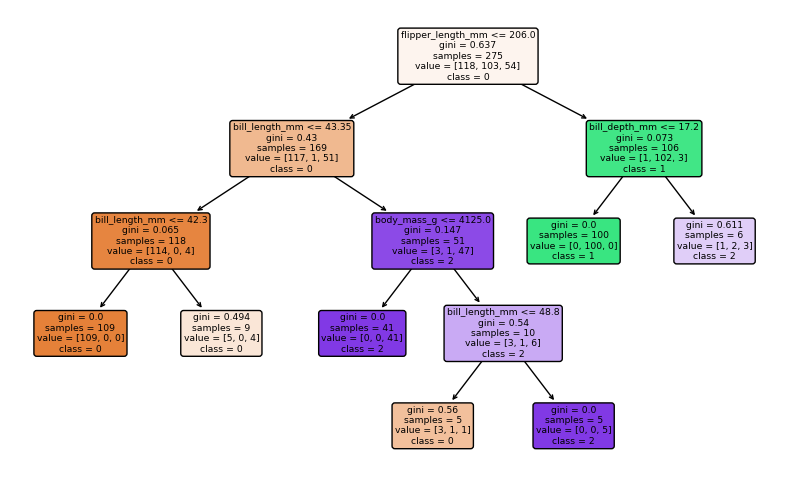

In [27]:
# Chuẩn default là Gini
accuracy_max = None
dept_max = None
model_best = None
for i in range(2,11):
    model = DecisionTreeClassifier(max_depth=i, random_state=42, min_samples_leaf=5) 
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    line = f"max_dept: {i}, accuracy: {accuracy}\n"
    print(line)        
    if accuracy_max == None and dept_max == None:
            accuracy_max = accuracy
            dept_max = i
            model_best = model
    if accuracy > accuracy_max:
        accuracy_max = accuracy
        dept_max = i
        model_best = model

        
print(f"Accuracy cao nhất là trường hợp có độ sâu tối đa là {dept_max}: {accuracy_max}")
plt.figure(figsize=(10, 6))
plot_tree(model_best, feature_names=feature_names, class_names=class_names, filled=True, rounded=True)
plt.show()


### Kết luận:
Thật sự kết quả rất tốt, do đó nên cân nhắc sử dụng những feature cần thiết trong quá trình huấn luyện mô hình